# Linear Least Squares Curve Fitting#


## Required reading 1 & 2 (follow the links)

For this prelab you will learn about linear least-squares fitting, then do an example curve-fit using the method. 

**First** Review how Python functions work.  [This tutorial link](https://www.w3schools.com/python/python_functions.asp) has a straightforward set of examples.  Read this down to the section on "Keyword Arguments" (we will not commonly use those, but they can be handy.)

**Next** do the following required reading [found by clicking here](https://labs.phy.duke.edu/index.php/Labs:161L_Week_5_Prelab_v2).  




## Activity.   Write code to do your first fit with an example dataset

The final linear least-squares fitting equations are found [in section 2.3 of your pre-lab reading](https://labs.phy.duke.edu/index.php/Labs:161L_Week_5_Prelab_v2).  To complete this assignment, implement the method inside the provided function below in this notebook (the function is called "llsquares").  It should take two arrays as input for x data and y data, then return the fitted slope and y-intercept as a tuple (m, b).  

You should have the example-data file "llsquaresData1.csv", which has been included in the zip file that contained this pre-lab (but it is also available in Sakai).  Make sure this file is in the same directory as this Jupyter notebook, since you will load and use this data to test your function.  

To finish, in the last cell of this notebook some plotting has been provided to see how your fit looks compared to the data.

In [1]:
import numpy as np
import matplotlib.pyplot as pl

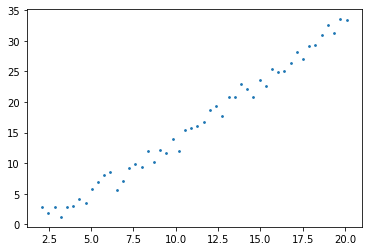

In [2]:
##  HERE IS HOW YOU LOAD UP A CSV FILE!  THE FILE IN QUESTION HAS TWO COLUMNS---
##  ONE FOR THE INDEPENDENT VARIABLE AND ONE FOR THE DEPENDENT VARIABLE.

#Load the test data from the file.  It must be in the same folder as this notebook.
(xdata,ydata) = np.loadtxt("llsquaresData2.csv",delimiter=',')

#Let's plot the data set to see what it looks like!   
pl.plot(xdata,ydata,'o',ms=1.75,label='Data')   #Plot the data!
pl.show()
pl.show()

#### Fill in the code in the function below to actually do the fit.  

* You may wish to review your coding skills & how to do calculations easily with Python arrays, from previous prelabs.

* AFTER READING THE COMMENTS IN THE FUNCTION BELOW, ERASE THEM AND REPLACE with your OWN comments to EXPLAIN WHAT EACH BLOCK OF RELATED CODE DOES.  You don't need to comment every single line, but you should comment each set of related lines that has some particular purpose.

In [3]:
#define a function which will perform least linear squares given two arrays

#Input: xd, the NumPy array storing values for the independent variable of the experimental data
#       yd, the NumPy array storing values for the dependent variable of the experimental data.

def llsquares(xd, yd):
    avgX = np.mean(xd) #Mean of Xs
    avgY = np.mean(yd) #Mean of Ys
    sumTop = np.sum(np.multiply(xd-avgX,yd-avgY)) #Top of fraction in formula
    sumBot = np.sum((xd-avgX)**2) #Bottom of fraction in formula
    m = sumTop/sumBot #slope
    b = avgY - m*avgX #Y-intercept
    return (m,b) #returns slope and y-intercept

#### Now you need to plot the model and the fit to see how they line up.
## Below you will need to fill in some code to calculate points for the fitted line

In [4]:
#The line below stores the tuple values returned by the fitting function into two variables
#   REMEMBER IN A CELL ABOVE, WE LOADED UP A CSV FILE CONTAINING AN EXPERIMENTAL DATA SET.  
#   THE INDEPENDENT VARIABLE VALUES WERE STORED AS 'xdata' AND THE DEPENDENT MEASURED
#  VALUES WERE STORED AS 'ydata'.

#Now simply call the function you defined.
slope_model, yint_model = llsquares(xdata, ydata)

#-- Now you should have the best-fit slope (slope_model) 
# and the  best-fit y intercept (yint_model)
#-- Now you need to USE these variables to calculate and plot a FUNCTION
# which gives you the y values of the fit line, given the x values (independent variable)
# of the data set itself!
# -- Remember that slope_model and  yint_model are floating point values 
# and xdata is a numpy array.

#**** Fill in the rest of this line of code:
ymodel = slope_model*xdata + yint_model


### Now it is time to calculate the uncertainty in your fit parameters and 
### the statistically determined uncertainty in your data points.

#### In the cells below, 

* Calculate the uncertainty $\sigma_m$ and $\sigma_b$ in the slope and intercept 
   (`slope_model` and `yint_model`)
* Determine $\sigma_y$, the statistically determined  uncertainty in the y data values.

As described in your reading for this prelab, this is essentially a determination of the 'standard deviation of your data about the line of best fit'.

In [6]:
sigy = ((np.sum(ydata-ymodel)**2)/(len(ydata)-2))**0.5
delta = len(xdata)*np.sum(xdata**2) - (np.sum(xdata))**2

In [8]:
sigb = sigy*((np.sum(xdata**2)/delta)**0.5)

In [9]:
sigm = sigy*((len(xdata)/delta)**0.5)

### Now plot the result: the data and the fit line together with error bars

In the code below, you should set the variable `sigma` equal to 
the calculated y uncertainty $\sigma_y$ of the example data set.  

We use an **errorbar** plot to show the uncertainties on the graph.

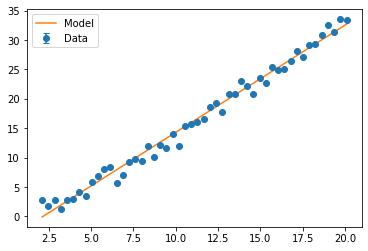

In [10]:

# ---- FILL IN THE RIGHT VALUE HERE AS EXPLAINED:
sigma = sigy

#Do the plotting:
#
#  THE FORMAT FOR AN ERROR BAR PLOT IS:
#     errorbar(x, y, yerr=None, xerr=None, fmt='', capsize= <size>)    
#  where fmt gives the data point style 
#       e.g.  'o', '+','.','o-','r-','g:', etc. are examples.
#  capsize is the size of the horizontal ends of the error bars.  It can be omitted.

#Plot the data!
pl.errorbar(xdata,ydata,yerr = sigma, fmt='o', capsize=3, label='Data' )   

#Plot the fit line you calculated, too.
pl.plot(xdata,ymodel,label='Model')  

#Show which curve is which
pl.legend()   
pl.show()     #Show the plot.

#If performed correctly your model should match your 
# data as well as statistically possible given the noise level in the data.

## Required Reading 3.  What is a weighted fit?


A **weighted** fit takes into account the size of your error bars.  Intuitively speaking, it makes sense that data points with larger error bars should exert less influence on the line of best fit.  Data points with very small error bars should have proportionately more influence in the calculation of best fit.  

Remember, for this prelab, our fit function will be a line:  $f(x_i) = m*x_i + b$.  As you should know from your previous reading, the *residual* is the vertical distance from the fit line to each actual data point $y_i$:

$$ r_i = y_i - f(x_i) $$

This way of defining the residuals assumes that each datapoint $y_i$ carries equal uncertainty!  

If instead each datapoint has a different error bar then we need an array of $\sigma_i$ values.  (Think:  "the standard standard error in the mean for each measurement"... or if your values were calculated fro the raw measurements, then think:  "the propagated uncertainty of each calculated value".) 

Then we must *weight* the residuals by the uncertainties so that data points of greater uncertainty exert less influence on the fit.  We can then define the *weighted* residuals in the following way (we will use the greek letter chi):

$$ \chi_i = \frac{y_i - f(x_i) }{\sigma_i}  $$

We could reword this by defining the *weights* as:

$$ W_i = \frac{1}{\sigma_i}$$ 

So our weighted residuals become:

$$ \chi_i = W_i\cdot\left(y_i - f(x_i)\right)  $$


Note that an *unweighted* curve fit means we are implicitly just defining all of the weights as equal to 1.  

You can see that residuals corresponding to data points with greater uncertainty are decreased in magnitude, therefore would have less effect on the sum of the squares of the residuals:

$$ S = \chi^2 = \sum \chi_{i}^2 = \sum \frac{r_i^2}{\sigma_i^2}$$

We define this quantity as $\chi^2$ (chi-squared) for a reason.  It is the square of the total sum of errors of your fit.  **Each individual $\chi_i$ measures how many standard deviations a given data point is from the curve of best fit** (that is, once you have found the best fit!)  It stands to reason that $\chi^2$ is an important measure of the *goodness of fit* to your data.  We will find out more about chi-squared in a future week!  

Remember that the whole goal of the least-squares fitting method (whether linear or non-linear, in the case that your $f(x)$ is an arbitrary function) is to *minimize* this sum $S$ (that is, minimizing $\chi^2$, the sum of the squares of the y-distances from the data to the chosen fit curve.) 

